In [2]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

from MultiArmedBandit import Arm, bernoulliArm, evolvingBernoulliArm
from Exp3 import exp3, exp3P, exp3_IX
from OtherBanditAlgorithms import UCB1, Random

Populating the interactive namespace from numpy and matplotlib


Ref : https://arxiv.org/pdf/1506.03271.pdf (Section 4)

10-arm bandit problem where
all losses are independent draws of Bernoulli random variables. 

The mean rewards of arms 1 through 8 are 0.5

The mean reward of arm 9 is $0.5 + \delta$ for all rounds $t = 1, 2, . . . , T$. 

The mean rewards of
arm 10 are changing over time: for rounds $t \leq \frac{T}{2}$, the mean is $0.5 - \delta$, and $0.5 + 4\delta$ afterwards.

/!\ We consider rewards instead of losses (opposite to the article) 

In [3]:
T = 10000
T2 = 5000
K = 10
delta = 0.1
MAB_IX = [bernoulliArm(0.5) for i in range(8)]
MAB_IX.append(bernoulliArm(0.5 + delta))
MAB_IX.append(evolvingBernoulliArm([0.5 - delta, 0.5 + 4*delta], T/2))

base_parameter = np.sqrt(np.log(K) / T * K)
print(base_parameter)

0.0479852591219


In [4]:
T = 10000
T2 = 5000

n_iter = 50
nb_multipliers = 20
R_T = np.zeros((3, nb_multipliers, n_iter))
R_T2 = np.zeros((3, nb_multipliers, n_iter))

X = np.logspace(-2, 4, nb_multipliers)

for j, multiplier in enumerate(X):
    print(multiplier)
    for i in range(n_iter):
        eta = multiplier * base_parameter
        rew, _, _ = exp3(MAB_IX, T, eta)

        rew_P, _, _ = exp3P(MAB_IX, T, beta=eta, gamma=min(0.95, eta), eta=eta)
        rew_IX, _, _ = exp3_IX(MAB_IX, T, eta, eta / 2)
        exp3_T2, exp3_P_T2, exp3_IX_T2 = np.sum(
            rew[: T2]), np.sum(rew_P[: T2]), np.sum(rew_IX[: T2])

        exp3_T, exp3_P_T, exp3_IX_T = exp3_T2 + np.sum(rew[T2:]), exp3_P_T2 + np.sum(rew_P[T2:]
                                                                                     ), exp3_IX_T2 + np.sum(rew_IX[T2:])
        
        R_T2[:, j, i] = [exp3_T2, exp3_P_T2, exp3_IX_T2]
        R_T[:, j, i] = [exp3_T, exp3_P_T, exp3_IX_T]

0.01


NameError: name 'exp3_Bianchi' is not defined

In [18]:
UCB_T = []
UCB_T2 = []
for i in range(n_iter):  
    rew_ucb, _ = UCB1(MAB_IX, T, rho=0.2)
    rew_cumsum = np.cumsum(rew_ucb)
    UCB_T.append(rew_cumsum[-1])
    UCB_T2.append(rew_cumsum[T2 - 1])
    
print(np.mean(UCB_T))
print(np.std(UCB_T))
print(np.mean(UCB_T2))
print(np.std(UCB_T2))

5703.94
426.953787195
2763.6
232.629490822


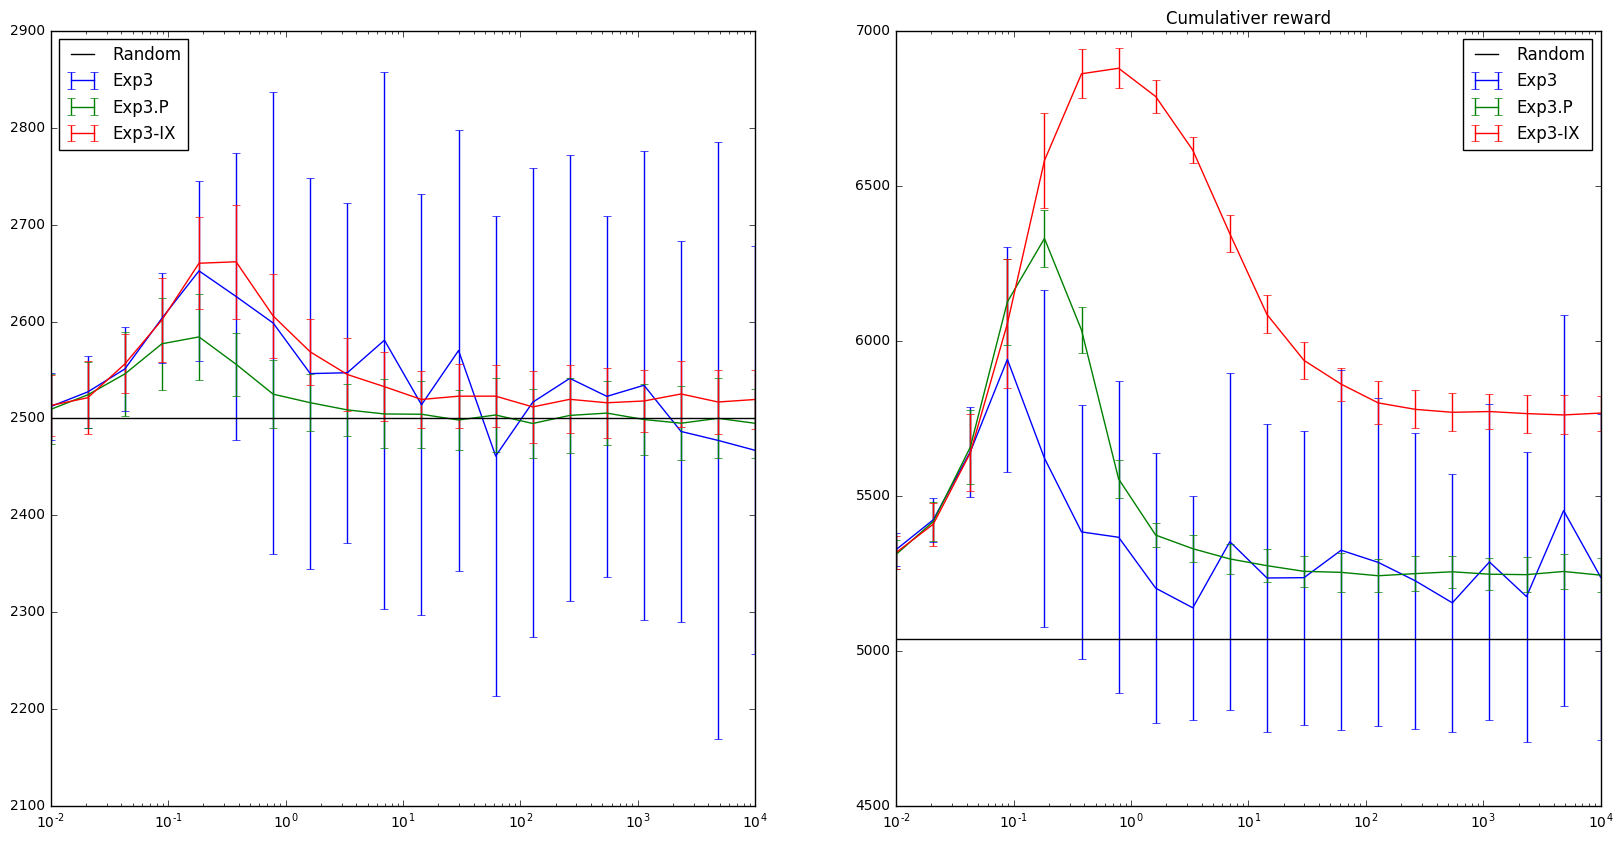

In [5]:
R_T_mean = np.mean(R_T, axis=2)
R_T2_mean = np.mean(R_T2, axis=2)
R_T_std = np.std(R_T, axis=2)
R_T2_std = np.std(R_T2, axis=2)


plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.semilogx()
plt.errorbar(X, R_T2_mean[0], R_T2_std[0], label="Exp3")
plt.errorbar(X, R_T2_mean[1], R_T2_std[1], label="Exp3.P")
plt.errorbar(X, R_T2_mean[2], R_T2_std[2], label="Exp3-IX")
plt.axhline(2500, c="black", label="Random")
plt.legend(loc="upper left")
plt.subplot(1,2,2)
plt.semilogx()
plt.errorbar(X, R_T_mean[0], R_T_std[0], label="Exp3")
plt.errorbar(X, R_T_mean[1], R_T_std[1], label="Exp3.P")
plt.errorbar(X, R_T_mean[2], R_T_std[2], label="Exp3-IX")
plt.axhline((2 + 0.015) * 2500, c="black", label="Random")
plt.legend()
plt.title("Cumulative reward")

In [14]:
T = 10000
T2 = 5000
K = 10
delta = 0.1
MAB_IX = [bernoulliArm(0.5) for i in range(8)]
MAB_IX.append(bernoulliArm(0.5 + delta))
MAB_IX.append(evolvingBernoulliArm([0.5 - delta, 0.5 + 4*delta], T/2))

base_parameter = np.sqrt(np.log(K) / T * K)
eta = 0.4 * base_parameter

Weights = np.zeros((3, T, K))
Probas = np.zeros((3,T,K))
Rewards = np.zeros((3, T))
nb_iter = 50
for i in range(nb_iter):
    rew, weights_exp, proba_hist_exp3 = exp3(MAB_IX, T, eta, gamma=eta)
    rew_P, weights_expP, proba_hist_exp3P = exp3P_Bianchi(MAB_IX, T, beta=eta, gamma=min(0.95, eta), eta=eta)
    rew_IX, weights_expIX, proba_hist_expIX = exp3_IX(MAB_IX, T, eta, eta / 2)
    rew_cumsum = np.cumsum(rew)
    rewP_cumsum = np.cumsum(rew_P)
    rewIX_cumsum = np.cumsum(rew_IX)
    Rewards += [rew_cumsum, rewP_cumsum, rewIX_cumsum]
    Weights += [weights_exp, weights_expP, weights_expIX]
    Probas += [proba_hist_exp3, proba_hist_exp3P, proba_hist_expIX]
    
Rewards /= nb_iter
Weights /= nb_iter
Probas /= nb_iter

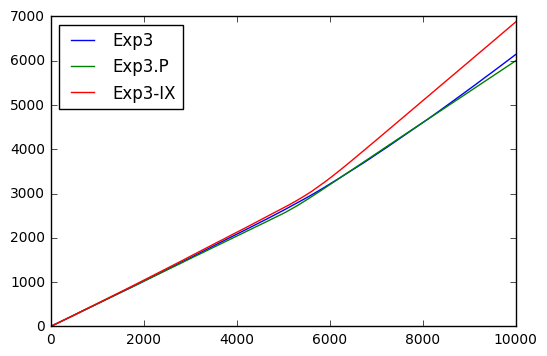

In [15]:
plt.plot(Rewards[0])
plt.plot(Rewards[1])
plt.plot(Rewards[2])
plt.legend(["Exp3", "Exp3.P", "Exp3-IX"], loc="upper left")

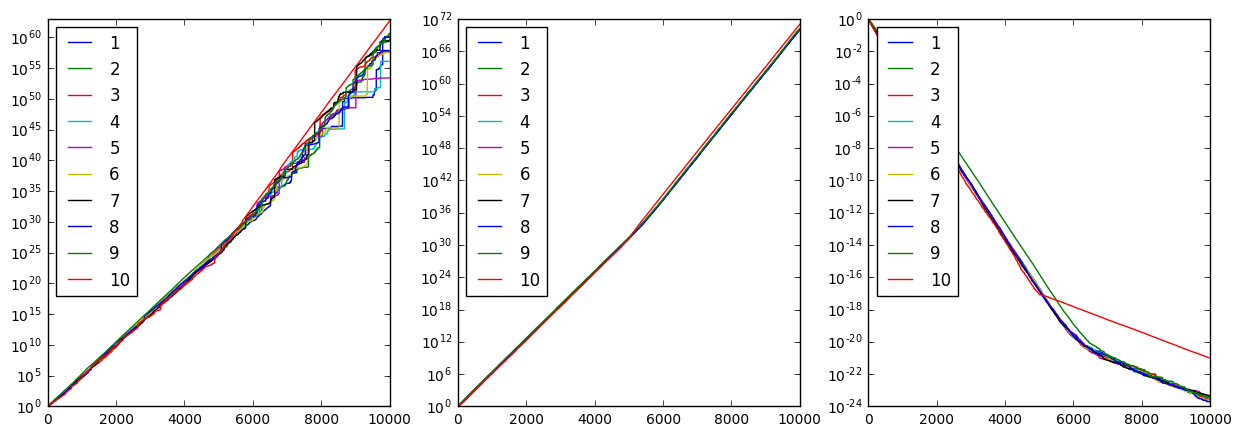

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(Weights[0])
plt.semilogy()
plt.legend([i+1 for i in range(10)], loc="upper left")
plt.subplot(1,3,2)
plt.plot(Weights[1])
plt.semilogy()
plt.legend([i+1 for i in range(10)], loc="upper left")
plt.subplot(1,3,3)
plt.plot(Weights[2])
plt.semilogy()
plt.legend([i+1 for i in range(10)], loc="upper left")

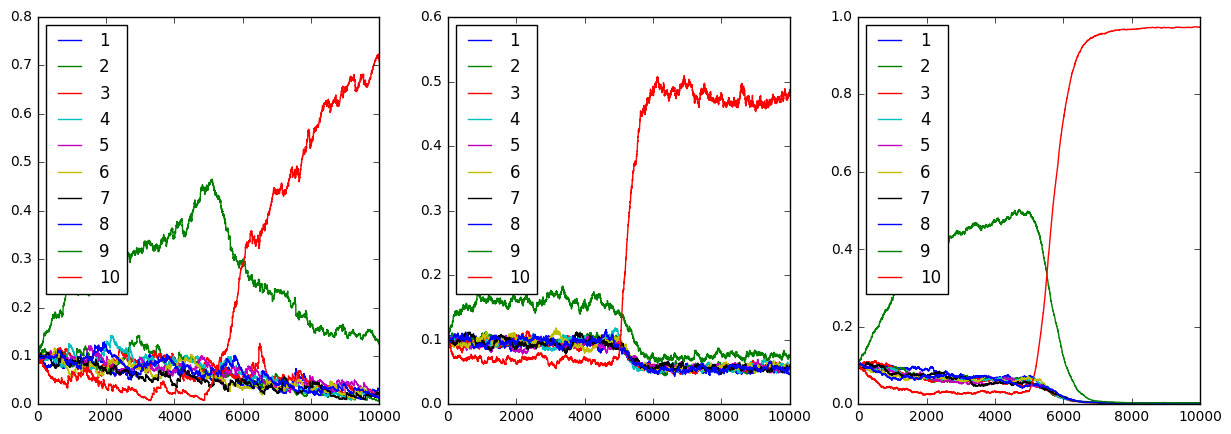

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(Probas[0])
plt.legend([i+1 for i in range(10)], loc="upper left")
plt.subplot(1,3,2)
plt.plot(Probas[1])
plt.legend([i+1 for i in range(10)], loc="upper left")
plt.subplot(1,3,3)
plt.plot(Probas[2])
plt.legend([i+1 for i in range(10)], loc="upper left")